In [1]:
import pandas as pd
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn import svm

# Packages for visuals
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

In [2]:
df = pd.read_csv('/Users/arman/Skripsi/Dataset/BigData/Fix/Piala-Dunia-Label-Clean.csv')
df = df.drop(labels="Unnamed: 0", axis=1)
df

,Steming,Label
0,lupa gagal tuan rumah piala dunia mari tata se...,negatif
1,gagal helat piala dunia indonesia jadi alam de...,positif
2,citra bela palestinapake syal palestina baca b...,negatif
3,coret tuan rumah piala dunia bentar coret tuan...,netral
4,ketua erick thohir alas fifa batal posisi indo...,netral
...,...,...
14802,piala dunia batal gelar indonesia,netral
14803,juang indonesia tuan rumah piala dunia siasia,negatif
14804,guru indonesia tuan rumah piala dunia nasib sa...,netral
14805,main timnas indonesia tumpah kecewa piala duni...,negatif


In [3]:
pd.value_counts(df['Label'])

negatif    6769
positif    4946
netral     3092
Name: Label, dtype: int64

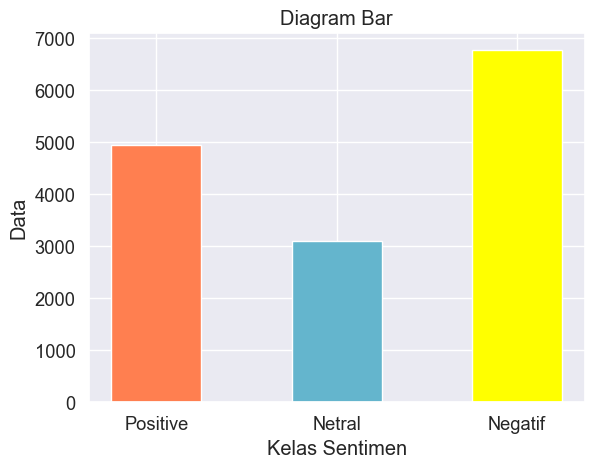

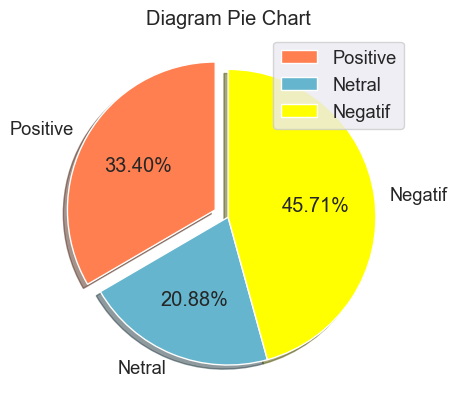

In [4]:

labels = ['Positive','Netral','Negatif']
Category2 = [4946,3092,6769]
plt.bar(labels, Category2, tick_label=labels, width=0.5, color=['coral', 'c','yellow'])
plt.xlabel('Kelas Sentimen')
plt.ylabel('Data')
plt.title('Diagram Bar')
plt.show()

#pie chart
color = ['coral', 'c','yellow']
plt.pie(Category2, labels=labels, colors=color,startangle=90, shadow=True, autopct='%1.2f%%', explode=(0.1, 0, 0))
plt.title('Diagram Pie Chart')
plt.legend()
plt.show()

## Split Dataset

In [3]:
# Split into train and test data

train_X, test_X, train_Y, test_Y = model_selection.train_test_split(df['Steming'], df['Label'], test_size = 0.2, random_state = 0)
# random_state = 0 menyatakan tidak ada pengacakan pada data yang di split yang artinya urutanny

In [4]:
# Membuat data frame dari hasil split
df_train80 = pd.DataFrame()
df_train80['Steming'] = train_X
df_train80['Label'] = train_Y

df_test20 = pd.DataFrame()
df_test20['Steming'] = test_X
df_test20['Label'] = test_Y

In [5]:
#Data frame train hasil pembagian 
df_train80

,Steming,Label
3885,indonesia batal tuan rumah piala dunia golkar ...,negatif
6612,ganjar pranowo harap putus kait batal indonesi...,positif
11546,fifa coret indonesia tuan rumah piala dunia,netral
9723,blunder fatal gali kubur mayoritas ganjarist d...,positif
8881,fifa kecewa indonesia tuan rumah piala dunia p...,negatif
...,...,...
4859,malam piala dunia cowo sosmed sedang main twit...,positif
3264,heboh piala dunia berita anies hilang dukung a...,positif
9845,piala dunia batal gibran moga renovasi manah m...,positif
10799,sayang sempat ina sudahkubur impi tampil piala...,positif


In [6]:
#Data Frame test Hasil Pembagian
df_test20

,Steming,Label
10784,tragedi kanjuruhan alas batal piala dunia indo...,negatif
2380,komunitas suporter bal sesal indonesia batal t...,positif
1379,jg jokowi mas sengaja korban mslh piala dunia,netral
154,pks sudah main cawe belaga kecewa piala dunia ...,negatif
8645,sedih banget timnas indonesia gagal mentas pia...,negatif
...,...,...
6402,sikap pks tolak israel citra milu saksi episod...,positif
1946,simak stadion stadion keren siap indonesia pia...,positif
10979,patah hati nasional coach justin indonesia bat...,negatif
9168,ayooo netijen serbu fifa media sosial indonesi...,positif


In [7]:
df_test20.to_csv('/Users/arman/Skripsi/Dataset/PembagianDataset/df_test20.csv')

## Pembobotan TF-IDF

In [8]:
# TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect_8020 = TfidfVectorizer()
tfidf_vect_8020.fit(df['Steming'])
train_X_tfidf_8020 = tfidf_vect_8020.transform(df_train80['Steming'])
test_X_tfidf_8020 = tfidf_vect_8020.transform(df_test20['Steming'])

In [9]:
#melihat hasil pembobotan TF-IDF pada data train
print(train_X_tfidf_8020)


  (0, 9331)	0.14436207035927773
  (0, 7709)	0.14498760663635168
  (0, 7699)	0.34950708527723834
  (0, 6968)	0.07712812946784978
  (0, 5811)	0.35039571001989567
  (0, 3396)	0.11284157200335806
  (0, 2832)	0.6073662697250092
  (0, 2733)	0.5481066574265417
  (0, 2130)	0.07695137255619673
  (0, 764)	0.1388799997244306
  (1, 9331)	0.19272967865217516
  (1, 7709)	0.19356479694443643
  (1, 7365)	0.3989793410637303
  (1, 7186)	0.41510821703378736
  (1, 6968)	0.10296942659791058
  (1, 3978)	0.41985125255009836
  (1, 3396)	0.15064843456933572
  (1, 3041)	0.48115889105185217
  (1, 2625)	0.32843665100885167
  (1, 2130)	0.1027334483891078
  (1, 764)	0.18541087455652092
  (2, 9331)	0.3269616833623454
  (2, 7709)	0.3283784432747469
  (2, 6968)	0.1746853794950191
  (2, 3396)	0.2555717734142356
  :	:
  (9760, 8094)	0.2387034247375896
  (9760, 7910)	0.22540303804456077
  (9760, 7868)	0.35799862546017036
  (9760, 7395)	0.2859398974311053
  (9760, 7103)	0.1812121315852362
  (9760, 6968)	0.0418048956961390

In [10]:
#melihat hasil pembobotan TF-IDF pada data test
print(test_X_tfidf_8020)

  (0, 9253)	0.5647648760134582
  (0, 6968)	0.123191560467753
  (0, 4049)	0.5213626319834349
  (0, 3396)	0.18023423408086878
  (0, 2130)	0.12290923857144567
  (0, 764)	0.22182365891481126
  (0, 200)	0.5452051765226045
  (1, 9331)	0.15176223506770994
  (1, 8687)	0.4836565921939735
  (1, 8185)	0.4225777653174116
  (1, 7709)	0.15241983704923054
  (1, 6968)	0.08108180552898485
  (1, 4522)	0.5934112881538016
  (1, 3396)	0.1186259599433832
  (1, 2130)	0.08089598785603674
  (1, 764)	0.1459991472270264
  (1, 635)	0.3749633369502781
  (2, 8119)	0.4660927359768616
  (2, 6968)	0.06190917309250853
  (2, 5800)	0.5413791435741662
  (2, 5274)	0.38453781196574566
  (2, 4581)	0.3670804535375426
  (2, 3880)	0.23320799348391777
  (2, 3837)	0.3808081979609485
  (2, 2130)	0.06176729393228091
  :	:
  (2439, 6030)	0.23805437759382583
  (2439, 5363)	0.14278967497671385
  (2439, 4914)	0.47610875518765167
  (2439, 3396)	0.038842832137697784
  (2439, 3363)	0.21136591157226528
  (2439, 3207)	0.13944566000987058
  

In [11]:
print(train_X_tfidf_8020.shape)
print(test_X_tfidf_8020.shape)

(9762, 10017)
(2441, 10017)


In [12]:
# You can use the below syntax to see the vocabulary that it has learned from the corpus
print(tfidf_vect_8020.vocabulary_)

{'lupa': 5074, 'gagal': 2574, 'tuan': 9331, 'rumah': 7709, 'piala': 6968, 'dunia': 2130, 'mari': 5255, 'tata': 8882, 'sepak': 8144, 'bola': 1130, 'indonesia': 3396, 'depan': 1757, 'kelam': 4192, 'mata': 5309, 'internasional': 3548, 'anti': 365, 'jajah': 3710, 'sinar': 8306, 'persepakbolaan': 6902, 'helat': 3102, 'jadi': 3690, 'alam': 196, 'dewasa': 1796, 'bangun': 697, 'semangat': 8072, 'tanah': 8820, 'air': 126, 'cinta': 1480, 'sepakbola': 8147, 'kuat': 4677, 'milik': 5620, 'respons': 7588, 'citra': 1491, 'bela': 852, 'palestina': 6574, 'pakai': 6552, 'syal': 8733, 'baca': 575, 'buku': 1262, 'kait': 3978, 'sok': 8441, 'duluan': 2121, 'ganjar': 2625, 'kurangtapu': 4713, 'pas': 6673, 'diamkontradiktif': 1810, 'coret': 1560, 'bentar': 901, 'wbg': 9769, 'ketua': 4346, 'erick': 2315, 'thohir': 9096, 'alas': 200, 'fifa': 2446, 'batal': 764, 'posisi': 7140, 'lanjut': 4817, 'ajang': 137, 'situasi': 8351, 'kini': 4393, 'deret': 1767, 'nyata': 6344, 'bijak': 1028, 'pranowo': 7186, 'tuai': 9328,

## Penerapan Model SVM

In [13]:
from sklearn.svm import SVC

#Menerapkan pemodelan SVM pada data train
model = SVC(kernel='linear', 
            decision_function_shape='ovr',
           C=1.0)
clf = model.fit(train_X_tfidf_8020,train_Y)



# SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
#     decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
#     kernel='linear', max_iter=-1, probability=False, random_state=None,
#     shrinking=True, tol=0.001, verbose=False)

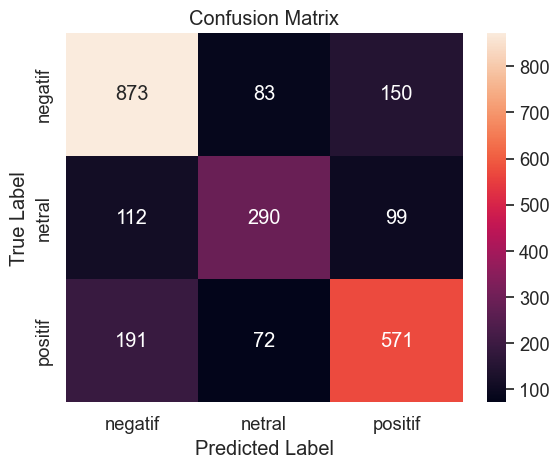

In [18]:
# Proses Pengujian
predictions_SVM_8020 = clf.predict(test_X_tfidf_8020)

#simpan data frame
test_prediction_8020 = pd.DataFrame()
test_prediction_8020['Text'] = test_X
test_prediction_8020['Label'] = predictions_SVM_8020

test_prediction_8020.to_csv('/Users/arman/Skripsi/Dataset/PembagianDataset/test_prediction_8020.csv')

from sklearn.metrics import confusion_matrix
#confusion Matrix

class_label = ["negatif","netral","positif"]
df_cm = pd.DataFrame(confusion_matrix(test_Y, predictions_SVM_8020), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
     

In [19]:
# Accuracy, Precision, Recall, f1-score
from sklearn.metrics import f1_score, precision_score, recall_score,accuracy_score
from sklearn.metrics import classification_report

print (classification_report(test_Y, predictions_SVM_8020))

print("Accuracy of the model : ", accuracy_score(test_Y, predictions_SVM_8020))
print('Precision of the model: ', precision_score(test_Y, predictions_SVM_8020, average='macro'))
print('Recall of the model: ', recall_score(test_Y, predictions_SVM_8020, average='macro'))
print('F1-score of the model: ', f1_score(test_Y, predictions_SVM_8020, average='macro'))



              precision    recall  f1-score   support

     negatif       0.74      0.79      0.77      1106
      netral       0.65      0.58      0.61       501
     positif       0.70      0.68      0.69       834

    accuracy                           0.71      2441
   macro avg       0.70      0.68      0.69      2441
weighted avg       0.71      0.71      0.71      2441

Accuracy of the model :  0.7103646046702171
Precision of the model:  0.6967912651495238
Recall of the model:  0.684275171929678
F1-score of the model:  0.6895578466391807


# Pemodelan Naive Bayes

In [28]:
#coba
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
clf.fit(train_X_tfidf_8020,train_Y)
predictions= clf.predict(test_X_tfidf_8020)

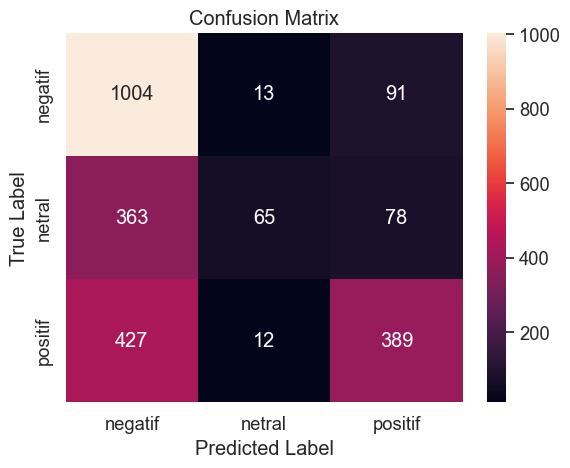

In [29]:
from sklearn.metrics import confusion_matrix
#confusion Matrix

class_label = ["negatif","netral","positif"]
df_cm = pd.DataFrame(confusion_matrix(test_Y, predictions), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
     

In [30]:
# Accuracy, Precision, Recall, f1-score

from sklearn.metrics import classification_report

print (classification_report(test_Y, predictions))


              precision    recall  f1-score   support

     negatif       0.56      0.91      0.69      1108
      netral       0.72      0.13      0.22       506
     positif       0.70      0.47      0.56       828

    accuracy                           0.60      2442
   macro avg       0.66      0.50      0.49      2442
weighted avg       0.64      0.60      0.55      2442



## Pemodelan RandomForest

In [31]:
#coba
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(train_X_tfidf_8020,train_Y)
predictionsRF= rf.predict(test_X_tfidf_8020)

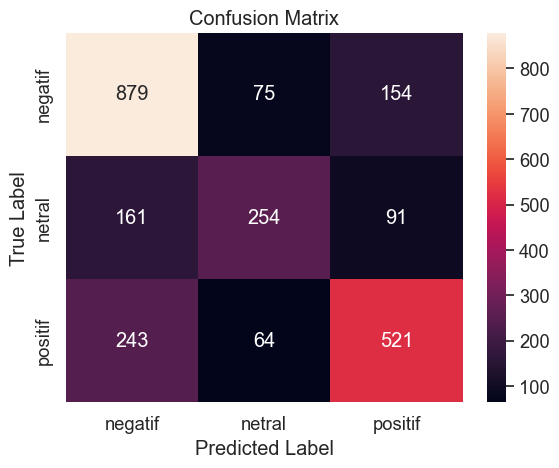

              precision    recall  f1-score   support

     negatif       0.69      0.79      0.74      1108
      netral       0.65      0.50      0.57       506
     positif       0.68      0.63      0.65       828

    accuracy                           0.68      2442
   macro avg       0.67      0.64      0.65      2442
weighted avg       0.68      0.68      0.67      2442



In [37]:
from sklearn.metrics import confusion_matrix
#confusion Matrix

class_label = ["negatif","netral","positif"]
df_cm = pd.DataFrame(confusion_matrix(test_Y, predictionsRF), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

print (classification_report(test_Y, predictionsRF))

## KNN clasifier

In [33]:
from sklearn.neighbors import KNeighborsClassifier

kn = RandomForestClassifier()
kn.fit(train_X_tfidf_8020,train_Y)
predictionsKN= kn.predict(test_X_tfidf_8020)

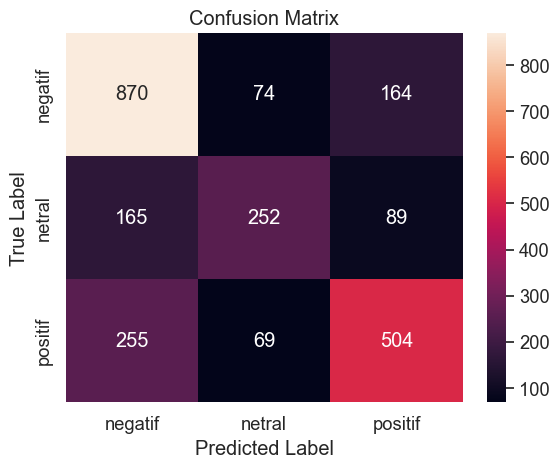

              precision    recall  f1-score   support

     negatif       0.67      0.79      0.73      1108
      netral       0.64      0.50      0.56       506
     positif       0.67      0.61      0.64       828

    accuracy                           0.67      2442
   macro avg       0.66      0.63      0.64      2442
weighted avg       0.66      0.67      0.66      2442



In [38]:
from sklearn.metrics import confusion_matrix
#confusion Matrix

class_label = ["negatif","netral","positif"]
df_cm = pd.DataFrame(confusion_matrix(test_Y, predictionsKN), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

print (classification_report(test_Y, predictionsKN))